### La libreria Pandas

La libreria pandas es una biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos 

### Instalar pandas

Podemos imnstalar pandas con pip

In [1]:
pip install pandas

  Using cached pandas-1.0.3-cp37-cp37m-macosx_10_9_x86_64.whl (10.0 MB)
Note: you may need to restart the kernel to use updated packages.


### Importar pandas

Se suele usar la siguiente forma abreviada:

In [3]:
import pandas as pd

### Contenido de pandas

Pandas se construye encima de NumPy y de Matplotlib. Los objetos más importantes de Pandas son las **Series** y los **DataFrames**.

### Series

El bloque primario sobre el que se construye Pandas son los objetos de tipo **Series**.
Una serie representa una lista o array unidimensional --basado en los arrays de numpy--, etiquetado e indexado. Al igual que un array, una serie puede contener cero o más valores de un unico y predeterminado tipo de datos.

Una serie se diferencia de un array de NumPy porque se le han añadido una serie de etiquetas que se usan para indexar y acceder de forma eficiente a los elementos del array, permitiendo acceder de otras formas además de por la posición . Esta capacidad es clave para Pandas y añado una potencialidad adicional en la forma de acceder a los elementos contenidos en la serie.

![Vector versus Pandas Series](./array-vs-pandas-series.svg "NumPy Array versus Pandas Series")

LAs series siempre tendrán un __índice__, aunque no se haya especificado. Si fuera ese el caso, Pandas creará un índice que consistira en una secuencia de enteros empezando por el cero, lo que coincidiría con el índice natural. Este comportamiento hace que el la serie se parezca un array, y es un comportamietno desable, ya que permite que, en la mayor parte de los casos, donde se este usando un array podemos cambiarlo por una serie de Pandas.

Pero aunque el acceso sea parecido, el acceso por el indice de Pandas no es por posición, sino por el valor de la etiqueta. Las etiquetas no tienen que ser consecutivas, ni números, se pueden repetir, pueden estar formadas por varios valores (jerarquía de etiquetas), y son usadas siempre por Pandas para el acceso a los elementos.

Una característica importante y muy apreciada de pandas es el alineamiento automático que se consigue con estas etiquetas. Las operaciones aplicaddas  sobre varias series -por ejemplo, una suma- no se realizan a ciegas alineando los elementos por su posición, sino que loas filas se alinean por las etiquetas del índice y se aplica la operación a aquellos elementos con el mismo valor de etiqueta o índice.

En cierta manera la serie se comporta como si fuera un diccionario, donde la etiqueta en el valor clave.

Veamos todo esto con un ejemplo. Podemos crear series de Pandas a partir de cualquier secuencia:

In [1]:
import pandas as pd

s = pd.Series(['Star Wars', 'Star Trek', 'Galactica'])
assert s[0] == 'Star Wars'
s

0    Star Wars
1    Star Trek
2    Galactica
dtype: object

Podemos especificar las etiquetas a usar, si queremos:

In [2]:
import pandas as pd

s = pd.Series(
    ['Star Wars', 'Star Trek', 'Galactica'],
    index=['sw', 'st', 'g']
)
assert s['sw'] == 'Star Wars'
s

sw    Star Wars
st    Star Trek
g     Galactica
dtype: object

**Ejercicio**: Usar la funcion `mean` del modulo `statistics` para calcular la media de
los valores de una serie. ¿Funciona?

In [46]:
import random
import pandas as pd
import statistics

s = pd.Series([random.random() for _ in range(10000)])

statistics.mean(s)

0.500366444363285

### Alineado automático

Veamos como funciona lo de del alineado automático. Esto era que no hace las operaciones  a lo loco, solo en aquellos casos en que se correspondadn las etiquetas:

In [39]:
import pandas as pd

s1 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([2, 3, 4, 5], index=['b', 'c', 'd', 'e'])
s = s1 + s2
s

a     NaN
b    22.0
c    33.0
d    44.0
e     NaN
dtype: float64

El valor especial __`NaN`__ significa *Not a Number* y en la práctica significa _No sé lo que es, pero no es un número_. Cuando operamos con `NaN` todo se vuelve muy sencillo (A la par que inutil). Por ejemplo, la suma de cualquier numero con `NaN` es `NaN`.

Como la serie `s2` no tiene valor para la etiqueta `a`, se asume `NaN`. Ahora sumanos ese valor con `s1`, que si tiene un valor etiqeutado `a`, pero como la suma de `NaN` con cualquier número es `NaN`, eso es lo que obtenemos. 

Igual pasa con el valor etiquetado con `e`, solo que en este caso si esta en la segunda serie, pero no en la primera.

Una serie también se puede crear a partir de un diccionario; las claves del diccionario seran las etiquetas de la Serie. Otra cosa característica de la serie es que puede tener un nombre.

In [44]:
import pandas as pd

s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
    name='scifi'
)
assert s.name == 'scifi'
s

sw               Star Wars
st               Star Trek
bg    Battleship Galactica
Name: scifi, dtype: object

Como hemos visto, el acceso a un elemento se hace mediante la etiqueta, pero tambien podemos acceder por posición usando `iloc`:

In [6]:
import pandas as pd

s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
    name='scifi')

s.iloc[2]

'Battleship Galactica'

Podemos obtener los contenidos de la secuencia en forma de
array de NumPY con la propiedad `values`:

In [7]:
import pandas as pd

s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
)

for item in s.values:
    print(item)

Star Wars
Star Trek
Battleship Galactica


E igualmente podemos obtener los valores del índice 
con la propiedad `index`:

In [8]:
import pandas as pd

s = pd.Series(
    {'sw': 'Star Wars', 'st': 'Star Trek', 'bg': 'Battleship Galactica'},
)

for item in s.index:
    print(item)

sw
st
bg


Esto nos puede ser útil para crear un array con las mismas etiquetas a partir de uno ya existente:

In [10]:
import pandas as pd

l = pd.Series(range(7), index='a b c d e f g'.split())
l2 = pd.Series(2, index=l.index)
l2

assert len(l2) == 7
assert l['a'] == 0
assert l2['a'] == 2
l + l2

a    2
b    3
c    4
d    5
e    6
f    7
g    8
dtype: int64

Podemos crear tambien una serie de Pandas a partir de un array de NumPy:

In [26]:
import numpy as np
import pandas as pd

array = np.random.randn(200)
s = pd.Series(array, name='noise')
s.tail()
s.head()

0    0.908948
1   -0.205891
2    0.133789
3   -0.491547
4    1.387449
Name: noise, dtype: float64

Un método muy cómodo para ver los datos de una serie es `head()`, que nos muestra como máximo los 5 primeros elementos de la misma. Otra característca interesante esel atributo `shape`, que nos devolverá una tupla; el primer elemento es el número de filas, el segundo las columnas. O tambien podemos usar la función `len` sobre la serie:

In [28]:
import numpy as np
import pandas as pd

s = pd.Series(np.linspace(-10, 10, 30))
assert s.shape[0] == len(s)
s.shape

(30,)

Para más precisión, podemos usar `count`, que devolverá el número de elementos que no sean `NaN`, o `unique()`, que devolverá el número valores unicos de elementos en la serie. Si necesitamos, además de los valores únicos, es recuento total de cada valor, podemos usar `value_counts()`.

In [34]:
import numpy as np
import pandas as pd

s = pd.Series(np.linspace(-10, 10, 30))
s.count()

30

In [35]:
import numpy as np
import pandas as pd

s = pd.Series([2, 5, 5, 7, 2, 8, 1, 1, 1, 2, 3, 7, None])
print('Tam:', len(s))
print('N de elementos:', s.count())
print('Valores unicos:', s.unique())
s.value_counts()

Tam: 13
N de elementos: 12
Valores unicos: [ 2.  5.  7.  8.  1.  3. nan]


1.0    3
2.0    3
7.0    2
5.0    2
3.0    1
8.0    1
dtype: int64

### Dataframes

Un DataFrames es un montón de series, todas las cuales __comparten el mismo índice__. Cada columna en una serie por si misma. Se puede pensar en ellos como en una hoja Excel. Pero mejor. Una de las cosas interesantes es que mantiene la alineación automática, asi como las operaciones paralelas al estilo de NumPy.

Podemos crear un pandas de muchas formas, a partir de listas y diccionarios, con arrays de NumPy, etc... Una forma muy habital es, por ejemplo, a partir de un fichero .CSV:

In [47]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

Podemos hacernos una idea del contenido de DataFrame, tal y cono los ha interpretado, usando el metodo `head`, que vimos anteriormente en la sección de las Series. Unsado el nombre de cada una de las series que componen el dataframe, podemos usarla como si fuera una serie independiente:

In [48]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,1,1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


O el método `tail`, que nos permitiria ver las ultimas filas. Tanto `head` como `tail` aceptan
como parametro opcional el número de lineas que debe devolver. 

**Ejercicio**: Cambia la celda anterior para que muestre las tres ultimas filas.

El metod `sample` nos devuelve una muestra del dataframe. Podemos pasarle como parámetro el numero de muestras que queremos como resultado. Por defecto es 1:

In [51]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

titanic.sample(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
678,3,0,"Boulos, Master. Akar",male,6,1,1,2678,"15,2458",NaN,C,NaN,NaN,"Syria Kent, ON"


**Ejercicio**: Modificar la celda anterior para ver 10 muestras, no solo una.

Con el atributo `dtypes` podemos ver el tipo de cada columna:

In [103]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age           object
sibsp          int64
parch          int64
ticket        object
fare          object
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Podemos acceder a las dataframes tambien como si fueran un diccionario, pero
en este caso, accedemos a la columna. Por ejemplo, para extraer la columna 
de las edades (de nombre `age`), es tan sencillo como `titanic['age']` o 
`titanic.age`:

In [71]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

titanic['age']

0         29
1          1
2          2
3         30
4         25
        ... 
1304    14,5
1305     NaN
1306    26,5
1307      27
1308      29
Name: age, Length: 1309, dtype: object

**Ejercicio**: comprobar que las dos formas de accedr devuelven los mismos datos. El siguiente 
script comprueba que accediendo de las dos maneras, como diccionario o por nombre, los nombres
de los pasajeros concuerda. Ejecutalo para comprobar que funciona. Se te ocurre otra manmera
mejor de hacerlo?

In [161]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

for i in titanic.index:
    assert titanic.name[i] == titanic['name'][i]

Vamos a usar matplot lib para hacer un histograma a partir de las edades de los pasajeros

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

plt.hist(titanic['age'], bins=7)
plt.show()

Ooops, [Houston, tenemos un problema](https://es.wikipedia.org/wiki/Houston,_tenemos_un_problema).

En estos casos es muy posible que haya algo raro en los datos. Poedemos usar
la funcion `describe` para obtener mas informacion de una serie o un dataframe
incluyendo medias, desviaciones estandar, máximos, mínimos, quartiles:

In [133]:
titanic.age.describe()


count     1046
unique      98
top         24
freq        47
Name: age, dtype: object

In [134]:
titanic.describe()

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.498854,0.385027,160.809917
std,0.837836,0.486055,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


Vemos que el dataframe informa en la mayoria de las columnas hay 1309 entradas,
pero la informacion de age nos indica 1046. Esto suele indicar que hay valores `NaN`
o nulos. Podemos verificarlo fácil filtrando con ayuda del método `isna`; esta funcion
devuelve `True` para valores cono `NaN` o `None`, y `False` para valores reales:

In [135]:
titanic[titanic.age.isna()==True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,"25,9250",NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,"26,5500",NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,"39,6000",NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,"31,0000",NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,"27,7208",NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,"8,0500",NaN,S,NaN,NaN,NaN
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,"7,2500",NaN,S,NaN,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,"7,2250",NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,"14,4583",NaN,C,NaN,NaN,NaN


Intentemos hacer el plot ahora, eliminando esas filas. Podriamos filtrarlos haciendo una seleccion
binaria, pero este caso es tan comun que hay un método específico para ello, `dropna()`:

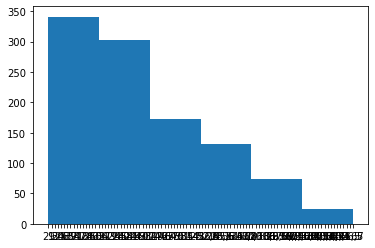

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

ages = titanic.age.dropna()
plt.hist(ages, bins=6)
plt.show()

Si queremos acceder a varios valores, podemos acceder por un array de indices o con un array de booleanos:

In [132]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

titanic.name[[1,2,3,4,95]]

1                      Allison, Master. Hudson Trevor
2                        Allison, Miss. Helen Loraine
3                Allison, Mr. Hudson Joshua Creighton
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
95              Dodge, Mrs. Washington (Ruth Vidaver)
Name: name, dtype: object

La primera columna es el índice o etiquetas. Podemos elegir las filas que que se muestran haciendo una selección antes igual que con una serie. Vamos a buscar a ver si encontramos al personaje que interpreta DiCaprio en la película:

In [145]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

q1 = titanic[['name', 'sex', 'age', 'survived']]
q1[(titanic.sex == 'male') & (titanic.age == '20')]


,name,sex,age,survived
520,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",male,20,1
606,"Abrahamsson, Mr. Abraham August Johannes",male,20,1
615,"Alhomaki, Mr. Ilmari Rudolf",male,20,0
633,"Andreasson, Mr. Paul Edvin",male,20,0
654,"Baccos, Mr. Raffull",male,20,0
664,"Barah, Mr. Hanna Assi",male,20,1
673,"Betros, Mr. Tannous",male,20,0
718,"Coelho, Mr. Domingos Fernandeo",male,20,0
836,"Gustafsson, Mr. Alfred Ossian",male,20,0
846,"Hampe, Mr. Leon",male,20,0


No aparece ningún Jack Dawson. A ver si va a ser mentira...

Como vimos antesm, al igual que un array de numpy podemos obtener las columnas (Proyectar, en jerga informática) usando los vectores booleanos que son el resultado de operaciones vectorizables, pero con la comodidad de acceder no solo por posición sino por nombre:

In [146]:
import pandas as pd

titanic = pd.read_csv('../../files/titanic.csv')

males = titanic[titanic['sex']=='male']
females = titanic[titanic['sex']=='female']
print('Nº de varones:', len(males))
print('Nº de mujeres:', len(females))

Nº de varones: 843
Nº de mujeres: 466


podemos representar una gráfica de edades con el método `plot`, que ya está incluido por defecto en las Series y en los Dataframes:

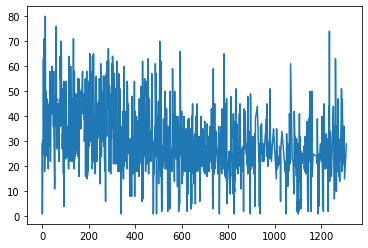

In [164]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

ages = pd.to_numeric(titanic.age, errors='coerce').dropna()
# ages = pd.Series(np.linspace(0,10,1000))
ages.plot()

O usar otras posibilidades, como el método `hist` incluido en el DataFrame, para representar un histograma de una serie de valores:

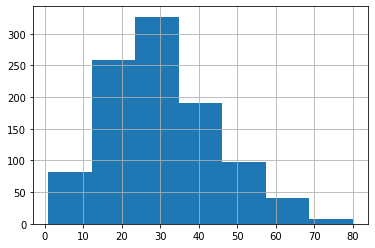

In [166]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

ages = pd.to_numeric(titanic.age, errors='coerce').dropna()
# ages = pd.Series(np.linspace(0,10,1000))
ages.hist(bins=7)

Atención a la llamada a `to_numeric`, el dato en la columda está como texto. Este tipo de operaciones de limipeza son muy comunes.

Con respecto al uso de `NaN`, Pandas lo gestiona de forma diferente a NumPy. En NumPY, los cálculos producen un error en cuanto aparece un `NaN`, mientras que Pandas, en general, tienden a obviarlo.

In [168]:
import pandas as pd
import numpy as np

nda = np.array([1, 2, 3, 4, 5])
assert nda.mean() == 3.0

nda = np.array([1, 2, 3, 4, np.NaN])
nda.mean() == np.NaN

s = pd.Series(nda)
s.mean() == 2.5

True

Es este caso, Pandas ignora totalmante el valor `NaN`. este valor es habitual para aquellos casos. Es el comportamiento habitual con herramientas estadísiticas, en las que se espera datos incompletos, que iremos refinando poco a poco. En caso de ser necesario, las librerias de Panda incorporan un parámetro que los fuerza a trabajar al modo de NunPY.


### Como seleccionar un subconjunto de un dataframe

- Pdemos seleccinar __columnas__, como ya hemnos visto, por nombre o usando el dataframe como si fuera un diccionario, usando los nombres de las columnas

In [172]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

name = titanic.name
name.sample(3)

1227    Strandberg, Miss. Ida Sofia
688       Braund, Mr. Lewis Richard
858                   Hee, Mr. Ling
Name: name, dtype: object

- Si queremos seleccionar varias columnas, podemos usar una lista de nombres como clave (Ojo a los dobles corchetes del ejemplo)

In [174]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

name_survived = titanic[['name', 'survived']]
name_survived.sample(3)

,name,survived
511,"Myles, Mr. Thomas Francis",0
580,"Ware, Mrs. John James (Florence Louise Long)",1
532,"Peruschitz, Rev. Joseph Maria",0


El primer ejemplo devuelve una serie, el segundo un Dataframe.

- Si quiero seleccionar por filas, una forma muy efectiva es usar
una serie de booleanos, obtenidos mediante alguna op0eracion de 
comparacion. Por ejemplo, para obtener los pasajeros cuya edad esta
comprendida entre 20 y 30 años: (observese el uso del operador `&`
para indicar _and_)

In [185]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

entre_20_y_30 = titanic[(titanic.age >= '20') & (titanic.age < '30')] 
entre_20_y_30.sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
407,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29,1,0,2926,"26,0000",NaN,S,16,NaN,NaN
712,3,0,"Celotti, Mr. Francesco",male,24,0,0,343275,"8,0500",NaN,S,NaN,NaN,London
803,3,0,"Foley, Mr. Joseph",male,26,0,0,330910,"7,8792",NaN,Q,NaN,NaN,"Ireland Chicago, IL"


- Usando funciones auxiliares. Por ejemplo, para obtener la lista de pasajeros
en cabinas de clase 2 y 3 hariamos:
    

In [184]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

class_23 = titanic[titanic["pclass"].isin([2, 3])]
class_23.sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
520,2,1,"Nourney, Mr. Alfred (""Baron von Drachstedt"")",male,20,0,0,SC/PARIS 2166,"13,8625",D38,C,7,NaN,"Cologne, Germany"
491,2,0,"Malachard, Mr. Noel",male,NaN,0,0,237735,"15,0458",D,C,NaN,NaN,Paris
855,3,0,"Hassan, Mr. Houssein G N",male,11,0,0,2699,"18,7875",NaN,C,NaN,NaN,NaN


Se podria haber hecho tambien usando simplemente filtrado booleano, pero es mas
comodo con la funcion `isin`:

In [187]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')
class_23 = titanic[(titanic["pclass"] == 2) | (titanic["pclass"] == 3)]
class_23.sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
765,3,1,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33,1,2,C.A. 2315,"20,5750",NaN,S,10,NaN,"Devon, England Wichita, KS"
1045,3,0,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18,0,0,347078,"7,7500",NaN,S,NaN,NaN,NaN
671,3,0,"Berglund, Mr. Karl Ivar Sven",male,22,0,0,PP 4348,"9,3500",NaN,S,NaN,NaN,"Tranvik, Finland New York"


- Acceso por indice, usando `iloc`. Por ejemplo, estoy interesadso en las filas de
la 10 a la 14:

In [193]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

titanic.iloc[10:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
10,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,"227,5250",C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,"227,5250",C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,"69,3000",B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26,0,0,19877,"78,8500",NaN,S,6,NaN,NaN
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,"30,0000",A23,S,B,NaN,"Hessle, Yorks"


Si uso una coma y un segundo rango, puedo filtrar por filas y columnas. Por ejemplo, para traer las mismas filas pero  solo las columnas de la 3 a la 5:

In [194]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

titanic.iloc[10:15, 3:6]

,sex,age,sibsp
10,male,47,1
11,female,18,1
12,female,24,0
13,female,26,0
14,male,80,0


**Miniproyecto**: Contar los numeros de muertos para cada clase. ¿Es posible que haya una correlaci'on entre clase de camarote y posibilida de sobrevivir?

In [206]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('../../files/titanic.csv')

In [207]:
subset = titanic[["pclass", "survived"]]

In [246]:
supervivientes = subset[subset["survived"]==1]
supervivientes.name = "Supervivientes"
fallecidos = subset[subset["survived"]==0]
fallecidos.name = "Fallecidos"

In [247]:
print(len(subset), len(fallecidos), len(supervivientes))

1309 809 500


In [248]:
supervivientes.groupby("pclass").count()

,survived
pclass,
1,200
2,119
3,181


In [249]:
fallecidos.groupby("pclass").count()

,survived
pclass,
1,123
2,158
3,528


In [250]:
fallecidos.groupby("pclass").count()
supervivientes.groupby("pclass").count()

,survived
pclass,
1,200
2,119
3,181


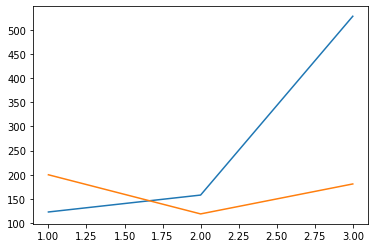

In [251]:
import matplotlib.pyplot as plt

plt.plot(fallecidos.groupby("pclass").count())
plt.plot(supervivientes.groupby("pclass").count())
plt.show()